# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

In [16]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study= pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice.
total_mice= mouse_study["Mouse ID"].nunique()
total_mice

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
trimmed_mouse= mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]
trimmed_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
trimmed_mouse_total= trimmed_mouse["Mouse ID"].nunique()
trimmed_mouse_total

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg= trimmed_mouse.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mid= trimmed_mouse.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var= trimmed_mouse.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std= trimmed_mouse.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem= trimmed_mouse.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
summary= pd.DataFrame({"Mean Tumor Volume":avg, "Median Tumor Volume":mid, 'Tumor Volume Variance':var, 'Tumor Volume Std. Dev.':std, 'Tumor Volume Std. Err.':sem })
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation= trimmed_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg[('avg','mid', 'var', 'std', 'sem')]
summary_aggregation

TypeError: 'method' object is not subscriptable

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

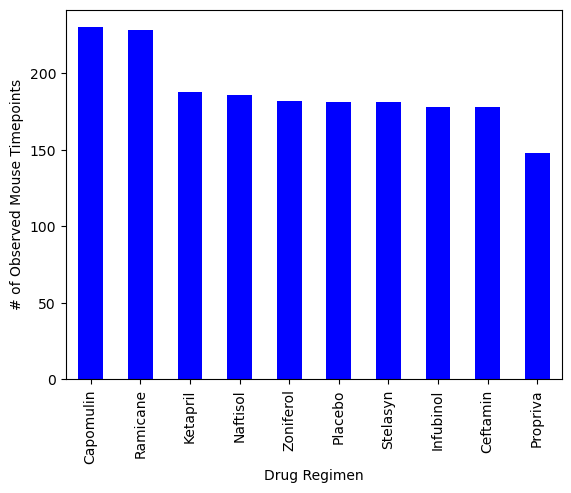

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice= trimmed_mouse["Drug Regimen"].value_counts()
mice.plot.bar(color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x= mice.index.values
y= mice.values
plt.bar= (x, y, color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (847904788.py, line 4)

<Axes: ylabel='Sex'>

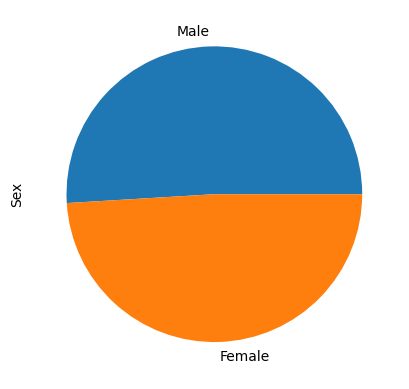

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female= trimmed_mouse["Sex"].value_counts()
pie1= male_female.plot.pie(y= "Total Count")
pie1

<Axes: ylabel='Sex'>

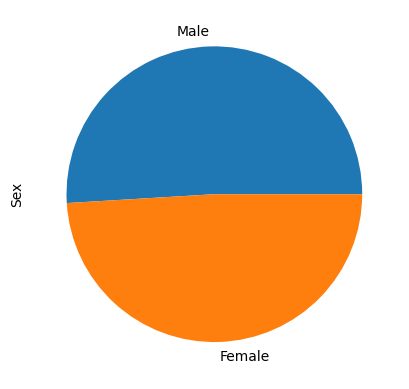

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female.plot.pie(y= 'Total Count')

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = trimmed_mouse.loc[trimmed_mouse["Drug Regimen"]== "Capomulin", :]
ramicane= trimmed_mouse.loc[trimmed_mouse["Drug Regimen"]== "Ramicane", :]
infubinol= trimmed_mouse.loc[trimmed_mouse["Drug Regimen"]== "Infubinol", :]
ceftamin= trimmed_mouse.loc[trimmed_mouse["Drug Regimen"]== "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_max= capomulin.groupby('Mouse ID').max()['Timepoint'] 
ramicane_max= ramicane.groupby('Mouse ID').max()['Timepoint']
infubinol_max= infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_max= ceftamin.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge= pd.merge(capomulin_max, trimmed_mouse, on=("Mouse ID","Timepoint"))
ramicane_merge= pd.merge(ramicane_max, trimmed_mouse, on=("Mouse ID","Timepoint"))
infubinol_merge= pd.merge(infubinol_max, trimmed_mouse, on=("Mouse ID","Timepoint"))
ceftamin_merge= pd.merge(ceftamin_max, trimmed_mouse, on=("Mouse ID","Timepoint"))

In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_tumor= capomulin_merge["Tumor Volume (mm3)"]
ramicane_tumor= ramicane_merge["Tumor Volume (mm3)"]
infubinol_tumor= infubinol_merge["Tumor Volume (mm3)"]
ceftamin_tumor= ceftamin_merge["Tumor Volume (mm3)"]
    # add subset 

    
    # Determine outliers using upper and lower bounds
capomulin_quart= capomulin_merge["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ramicane_quart= ramicane_merge["Tumor Volume (mm3)"].quantile([.25, .5, .75])
infubinol_quart= infubinol_merge["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ceftamin_quart= ceftamin_merge["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    
capomulin_low= capomulin_quart[.25]
ramicane_low= ramicane_quart[.25]
infubinol_low= infubinol_quart[.25]
ceftamin_low= ceftamin_quart[.25]


capomulin_up= capomulin_quart[.75]
ramicane_up= ramicane_quart[.75]
infubinol_up= infubinol_quart[.75]
ceftamin_up= ceftamin_quart[.75]

capomulin_iqr= capomulin_up-capomulin_low
ramicane_iqr= ramicane_up-ramicane_low
infubinol_iqr= infubinol_up-infubinol_low
ceftamin_iqr= ceftamin_up-ceftamin_low

capomulin_out_up= capomulin_tumor>capomulin_up
capomulin_out_low= capomulin_tumor<capomulin_low

ramicane_out_up= ramicane_tumor>ramicane_up 
ramicane_out_low= ramicane_tumor<ramicane_low

infubinol_out_up= infubinol_tumor>infubinol_up
infubinol_out_low= infubinol_tumor<infubinol_low

ceftamin_out_up= capomulin_tumor>capomulin_up
ceftamin_out_low= capomulin_tumor<capomulin_low

print ("Capomulin's potential outliers", capomulin_out_up, capomulin_out_low)
print ("Ramicane's potential outliers", ramicane_out_up, ramicane_out_low)
print ("Infubinol's potential outliers", infubinol_out_up, infubinol_out_low)
print ("Ceftamin's potential outliers", ceftamin_out_up, ceftamin_out_low)

Capomulin's potential outliers 0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13     True
14    False
15     True
16    False
17     True
18    False
19    False
20     True
21    False
22    False
23    False
24    False
Name: Tumor Volume (mm3), dtype: bool 0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19     True
20    False
21    False
22    False
23     True
24     True
Name: Tumor Volume (mm3), dtype: bool
Ramicane's potential outliers 0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19     True
20    False
21     True

{'whiskers': [<matplotlib.lines.Line2D at 0x2405e10e890>,
 'caps': [<matplotlib.lines.Line2D at 0x2405e10edd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2405e10e650>,
 'medians': [<matplotlib.lines.Line2D at 0x2405e10f310>,
 'fliers': [<matplotlib.lines.Line2D at 0x2405e10f5b0>,
 'means': []}

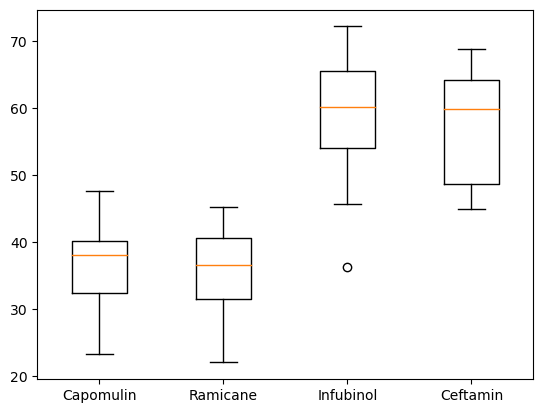

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box= [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]
whisk= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plot= plt.subplot()
plot.boxplot(box, labels= whisk)

## Line and Scatter Plots

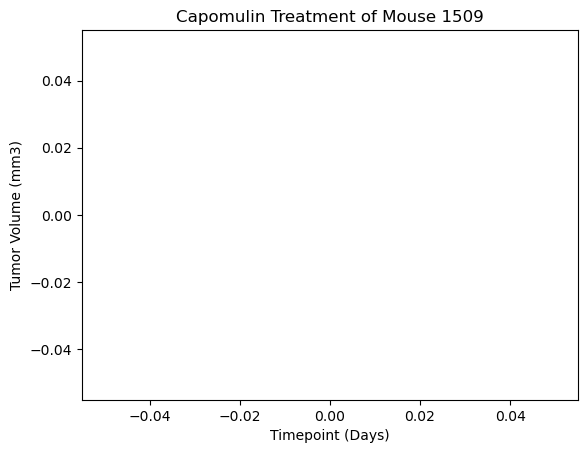

In [81]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line= capomulin.loc[capomulin["Mouse ID"]== "1509", :]
x= capomulin_line["Timepoint"]
y= capomulin_line["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x,y,linewidth=1, color= "blue")

Text(0, 0.5, 'Tumor Volume (mm3)')

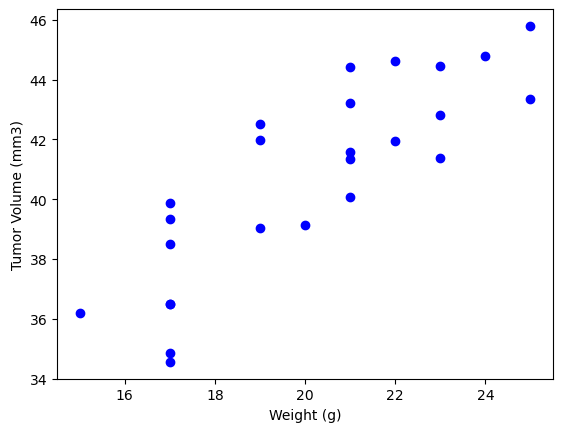

In [83]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg= capomulin.groupby(['Mouse ID']).mean()
marker_size= 7
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color= "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [87]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
marker_size= 7
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color= "blue")
plt.plot((capomulin_avg['Weight (g)'], color= "red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1834326925.py, line 5)